# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import os
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_requests =  requests.get(url)

In [4]:
with open("image_predictions.tsv", "wb") as f:
    f.write(df_requests.content)

In [5]:
df_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
df_list = []
with open("tweet_json.txt", encoding='utf-8') as file:
    data_read = file.readline()[:-1]
    while data_read:
        dataj = json.loads(data_read)
        id_tweet = dataj['id']
        nbr_favoris = dataj['favorite_count']
        nbr_retweet = dataj['retweet_count']
        df_list.append({'tweet_id': id_tweet,
                        'favorite_count': nbr_favoris,
                        'retweet_count': nbr_retweet})
        data_read = file.readline()[:-1]
    
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Archive Dataset evaluation

In [7]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1456,695314793360662529,NaN,NaN,2016-02-04 18:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Colin. He really likes green beans. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695314793...,10,10,Colin,None,None,None,None
396,825147591692263424,NaN,NaN,2017-01-28 01:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sweet Pea. She hides in shoe boxes and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825147591...,13,10,Sweet,None,None,None,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None


* we can visually observe from this sample the following quality and order issue : 
    1. Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id et retweeted_status_timestamp
    2. The age stage of the dogs are in 4 different columns.
    4. Wrong values in the name column : dog named 'the'

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* we can observe through the info function the following issues in this dataset : 
    1. in_reply_to_status_id and in_reply_to_user_id type float instead of int.
    2. timestamp type string instead of datatime 
    3. Some tweets are retweets.
    4. Missing values in expanded_urls

In [9]:
df_archive.query('rating_denominator<10 or rating_denominator>10 ').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


* we can observe through this query the following issues in this dataset : 
    1. Some dogs have denominator rating above and under 10

In [10]:
df_archive.duplicated().sum()

0

In [11]:
pd.set_option("display.max_rows", None)

In [12]:
df_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

* I went through all the names of dogs that is in the dataset one by one and got a list of the wrong names. 
['a','the','an','just','actually','mad','not','this','infuriating','old','my','O','his']

### Prediction tweets dataset

In [13]:
df_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
813,692535307825213440,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1,pug,0.413090,True,French_bulldog,0.199865,True,Chihuahua,0.081991,True
100,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
510,676146341966438401,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,1,Irish_water_spaniel,0.388332,True,standard_poodle,0.284121,True,greenhouse,0.034868,False


* From a visual observation the dataset looks fine except the the columns should have more understandable name.

In [14]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_prediction.tweet_id.duplicated().sum()

0

In [16]:
df_prediction.jpg_url.duplicated().sum()

66

* Another quality issue is duplicated images of dogs that have been rated

### Json API tweets dataset

In [17]:
df_json.sample(5)

,tweet_id,favorite_count,retweet_count
300,836677758902222849,13782,2522
634,793601777308463104,8926,1908
35,885311592912609280,0,19297
239,846514051647705089,48410,13076
2001,672475084225949696,1529,770


In [18]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
df_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


* Some tweets have zero favorite count and zero retweet we will next see what are the tweets that have zero favorite and retweet.

In [20]:
df_json.query('favorite_count == 0').head()

,tweet_id,favorite_count,retweet_count
31,886054160059072513,0,108
35,885311592912609280,0,19297
67,879130579576475649,0,7181
72,878404777348136964,0,1349
73,878316110768087041,0,6965


* Some tweets have a huge number of retweet  like 19297 and zero favorite count that means that some tweets have wrong values in the favorite count 

In [21]:
df_json.query('retweet_count == 0')

,tweet_id,favorite_count,retweet_count
290,838085839343206401,150,0


In [22]:
df_json.duplicated().sum()

0

In [23]:
df_json.tweet_id.duplicated().sum()

0

### Quality issues
1. Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id et retweeted_status_timestamp (done)

2. Wrong values in the name column : dog named 'the' (done)

3. in_reply_to_status_id and in_reply_to_user_id type float instead of int.(done)

4. timestamp type string instead of datatime (done)

5. Some tweets are retweets. (done)

6. Some dogs have denominator rating above and under 10 (done)

7. Rename Columns

8. Usless columns

9. Missing values in df_json and df_prediction

10. duplicated images of dogs that have been rated (Done)

### Tidiness issues
1. The age stage of the dogs are in 4 different columns. (done)

2. Merge the three datasets (Done)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_prediction_copy = df_prediction.copy()
df_archive_copy = df_archive.copy()
df_json_copy = df_json.copy()

### Issue #1: timestap attribute is of type string

#### Define : 
Convert the type of timestap to datetime

#### Code

In [25]:
df_archive['timestamp']= pd.to_datetime(df_archive['timestamp'])

#### Test

In [26]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Some tweets are retweets

#### Define : 
Some of the tweets in the dataset are retweets of original tweet, we will delete them

#### Code

In [27]:
df_archive.query('retweeted_status_timestamp==retweeted_status_timestamp or retweeted_status_id == retweeted_status_id or retweeted_status_user_id==retweeted_status_user_id ')['tweet_id'].sum()

-841094628243881820

* I select the tweets that are retweets and get its index and use drop to drop them

In [28]:
df_archive.drop(df_archive[df_archive.retweeted_status_id == df_archive.retweeted_status_id].index, inplace=True)

#### Test

In [29]:
df_archive.query('retweeted_status_timestamp==retweeted_status_timestamp or retweeted_status_id == retweeted_status_id or retweeted_status_user_id==retweeted_status_user_id ')['tweet_id'].sum()

0

### Issue #3: rating_denominator above and under 10

#### Define : 
The concept of the rating of this twitter account is to rate dogs with a rating denominator of 10 but we can see that in the dataset some of the ratings have a denominatore of under and above 10 to solve this problem i will delete all the rows with rating_denominator above or under 10

#### Code:

In [30]:
df_archive.query('rating_denominator<10 or rating_denominator>10 ').shape

(22, 17)

* same as when i deleted the retweets i get the index of all tweet that have a denominator above and under 10 and afterward delete them using drop function

In [31]:
df_archive.drop(df_archive.query('rating_denominator<10 or rating_denominator>10').index,inplace=True)

#### Test:

In [32]:
df_archive.query('rating_denominator<10 or rating_denominator>10 ').shape

(0, 17)

### Issue #4: Wrong values in the name column : dog named 'the'

#### Define:
Some of the dogs names are not really dog name, since the name of the dogs have been extracted from the text of the tweet the algorithm that extracted the words has also detected some random words as dog names like a, the,an. To solve this issue we will replace them with the none word.

#### Code:

In [33]:
replace_name = ['a','the','an','just','actually','mad','not','this','infuriating','old','my','O','his']

In [34]:
for name in replace_name:
    df_archive['name'].replace(name,'None',inplace=True) 

#### Test:

In [35]:
df_archive.name.value_counts()

None              744
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Penny               9
Tucker              9
Lola                8
Sadie               8
Winston             8
Toby                7
Daisy               7
Bo                  6
Koda                6
Bailey              6
Oscar               6
Stanley             6
Bella               6
Jax                 6
Chester             5
Buddy               5
Rusty               5
Dave                5
Bentley             5
Leo                 5
Louis               5
Milo                5
Scout               5
George              4
very                4
Winnie              4
Jack                4
Sophie              4
Boomer              4
Sammy               4
Larry               4
Maggie              4
Jerry               4
Oakley              4
Chip                4
Brody               4
Gary                4
Reggie              4
Derek               4
Archie              4
Bear      

### Issue #5: Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id


#### Define
To solve this issue i will use the fillna pandas function and fill the NaN values with zero this step will also help me later on convert the type of these two columns from float to int

#### Code:

In [36]:
df_archive['in_reply_to_user_id'].fillna(0, inplace=True)
df_archive['in_reply_to_status_id'].fillna(0,inplace=True)
df_archive['retweeted_status_id'].fillna(0, inplace=True)
df_archive['retweeted_status_user_id'].fillna(0,inplace=True)

#### Test:

In [37]:
df_archive.in_reply_to_user_id.isnull().sum()

0

In [38]:
df_archive.in_reply_to_status_id.isnull().sum()

0

In [39]:
df_archive.retweeted_status_id.isnull().sum()

0

In [40]:
df_archive.retweeted_status_user_id.isnull().sum()

0

### Issue #6: in_reply_to_status_id and in_reply_to_user_id type float instead of int.



#### Define
I will convert in_reply_to_user_id and in_reply_to_status_id to int using the function astype(int64)

#### Code

In [41]:
df_archive['in_reply_to_user_id'] =  df_archive.in_reply_to_user_id.astype('int64')
df_archive['in_reply_to_status_id'] =  df_archive.in_reply_to_status_id.astype('int64')

#### Test:

In [42]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       2153 non-null   int64              
 2   in_reply_to_user_id         2153 non-null   int64              
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         2153 non-null   float64            
 7   retweeted_status_user_id    2153 non-null   float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

### Issue #7: each type of dog is a column

#### Define
This issue concerns a tidness problem, in which we can see that each categorie of dog is a column , to resolve this issue we will combine the 4 columns into a single one

#### Code

In [43]:
df_archive['pupper'] = df_archive['pupper'].replace('None',' ')
df_archive['floofer'] = df_archive['floofer'].replace('None',' ')
df_archive['doggo'] = df_archive['doggo'].replace('None',' ')
df_archive['puppo'] = df_archive['puppo'].replace('None',' ')

In [44]:
df_archive['dog_age'] = df_archive['pupper']+' '+df_archive['floofer']+' '+df_archive['doggo']+' '+df_archive['puppo']

#### Test

In [45]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_age
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,0.0,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0.0,0.0,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0.0,0.0,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


### Issue #8: duplicated images of dogs that have been rated

#### Define
Some of the images of dogs have been used multiple times, we will solve this issue by deleting the duplicates

#### Code

In [46]:
df_prediction.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [47]:
df_prediction.jpg_url.duplicated().sum()

0

### Issue #9: Merge the three datasets

#### Define:
For this issue i will merge the three datasets (archive, json, and prediction) using inner merge function

#### Code

In [48]:
df_clean_tweet = pd.merge(df_prediction,df_archive,left_on='tweet_id',right_on='tweet_id')
df_clean_tweet = pd.merge(df_clean_tweet,df_json,left_on='tweet_id',right_on='tweet_id')

#### Test

In [49]:
df_clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1976 non-null   int64              
 1   jpg_url                     1976 non-null   object             
 2   img_num                     1976 non-null   int64              
 3   p1                          1976 non-null   object             
 4   p1_conf                     1976 non-null   float64            
 5   p1_dog                      1976 non-null   bool               
 6   p2                          1976 non-null   object             
 7   p2_conf                     1976 non-null   float64            
 8   p2_dog                      1976 non-null   bool               
 9   p3                          1976 non-null   object             
 10  p3_conf                     1976 non-null   float64         

### Issue #10: Useless Columns

#### Define
Some of the columns are not gone be used in the analyzing and visualizing step so we will drop them

#### Code

In [50]:
df_clean_tweet.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_age', 'favorite_count', 'retweet_count'],
      dtype='object')

In [51]:
columns_drop = [1,12,13,14,15,16,17,18,19,20,24,25,26,27]
df_clean_tweet.drop(df_clean_tweet.columns[columns_drop],inplace=True, axis=1)

#### Test

In [52]:
df_clean_tweet.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating_numerator',
       'rating_denominator', 'name', 'dog_age', 'favorite_count',
       'retweet_count'],
      dtype='object')

### Issue #11:Rename columns

#### Define
Rename columns that are not correctly named, some columns like p1_conf do not clearly tell us what the column containes and how to interpret it. to solve this issue i will rename the columns

#### Code

In [53]:
df_clean_tweet.rename(columns = {'p1':'Prediction_1', 'p1_conf':'P1_accuracy', 'p2':'Prediction_2', 'p2_conf':'P2_accuracy', 'p3':'Prediction_3', 'p3_conf':'P3_accuracy'}, inplace = True)

#### Test

In [54]:
df_clean_tweet.columns.values

array(['tweet_id', 'img_num', 'Prediction_1', 'P1_accuracy', 'p1_dog',
       'Prediction_2', 'P2_accuracy', 'p2_dog', 'Prediction_3',
       'P3_accuracy', 'p3_dog', 'rating_numerator', 'rating_denominator',
       'name', 'dog_age', 'favorite_count', 'retweet_count'], dtype=object)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_clean_tweet.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
df_dog_rating = pd.read_csv('twitter_archive_master.csv')
df_dog_rating.head()

,tweet_id,img_num,Prediction_1,P1_accuracy,p1_dog,Prediction_2,P2_accuracy,p2_dog,Prediction_3,P3_accuracy,p3_dog,rating_numerator,rating_denominator,name,dog_age,favorite_count,retweet_count
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10,None,,2535,532
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7,10,None,,132,48
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,9,10,None,,128,47
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6,10,None,,311,147
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,5,10,None,,111,41


### Insights:
1. What is the most common name?

2. what is the breed of the highest rating?

3. Is the dog with the highest rating, the tweet with the highest retweet and favorite count?

#### 1:  What is the most common name?

In [57]:
df_dog_rating.name.value_counts()

None              609
Charlie            11
Oliver             10
Cooper             10
Lucy               10
Penny               9
Tucker              9
Winston             8
Sadie               8
Toby                7
Lola                7
Daisy               7
Koda                6
Bella               6
Stanley             6
Bo                  6
Jax                 6
Oscar               5
Buddy               5
Chester             5
Louis               5
Bailey              5
Rusty               5
Scout               5
Leo                 5
Dave                5
Milo                5
Cassie              4
Bear                4
Chip                4
Clark               4
Finn                4
very                4
Larry               4
Scooter             4
Winnie              4
Jerry               4
Maggie              4
Reggie              4
Bentley             4
Derek               4
Archie              4
Phil                4
Dexter              4
one                 4
Jack      

* The results shows that None is the most common but since we already know that None is just a way to fill missing values and wrong names that makes Charlie the most common name with 11 dogs named that way in our dataset

#### 2:  What is the dog breed with the highest rating?

In [58]:
col = 'rating_numerator'
df_only_dogs = df_dog_rating.query('p1_dog == True and p2_dog==True and p3_dog==True')
df_only_dogs.loc[df_only_dogs[col].idxmax()]

tweet_id              778027034220126208
img_num                                1
Prediction_1                     clumber
P1_accuracy                     0.946718
p1_dog                              True
Prediction_2              cocker_spaniel
P2_accuracy                      0.01595
p2_dog                              True
Prediction_3                       Lhasa
P3_accuracy                     0.006519
p3_dog                              True
rating_numerator                      27
rating_denominator                    10
name                              Sophie
dog_age                     pupper      
favorite_count                      7320
retweet_count                       1885
Name: 1424, dtype: object

* The results shows the breed of dogs with the highest rating is Clumber

#### 3:  What is the breed of the dog with the highest retweet?

In [59]:
df_only_dogs.describe()

,tweet_id,img_num,P1_accuracy,P2_accuracy,P3_accuracy,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1.189000e+03,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.0,1189.000000,1189.000000
mean,7.420630e+17,1.224558,0.627774,0.143487,0.061188,10.970563,10.0,9340.322119,2763.436501
std,6.937515e+16,0.582462,0.253556,0.104115,0.052762,1.801601,0.0,12604.508454,4533.376621
min,6.660209e+17,1.000000,0.044333,0.000056,0.000011,2.000000,10.0,81.000000,16.000000
25%,6.783968e+17,1.000000,0.417107,0.055902,0.014763,10.000000,10.0,2236.000000,653.000000
50%,7.156808e+17,1.000000,0.633037,0.130726,0.048572,11.000000,10.0,4578.000000,1425.000000
75%,8.003883e+17,1.000000,0.853407,0.207753,0.094933,12.000000,10.0,11746.000000,3224.000000
max,8.921774e+17,4.000000,0.999876,0.467678,0.271042,27.000000,10.0,132810.000000,56625.000000


In [60]:
df_only_dogs.query('retweet_count==56625.000000')[['Prediction_1','retweet_count']]

,Prediction_1,retweet_count
1577,Chihuahua,56625


* And so the breed of the dog with the highest retweet is a chihuahua that has a rating of 13/10

### Visualization

* is there a relationship between the number of retweets and favorite of each tweet

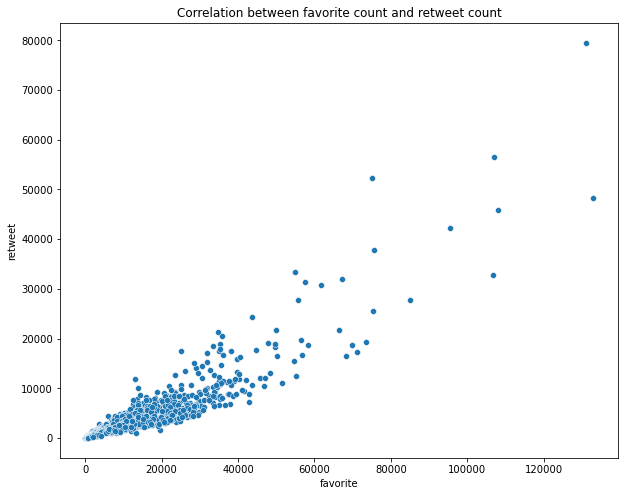

In [61]:
favorite = df_clean_tweet['favorite_count']
retweet = df_clean_tweet['retweet_count']
plt.figure(figsize=(10,8))
sns.scatterplot(x = favorite, y = retweet)
plt.title("Correlation between favorite count and retweet count")
plt.xlabel("favorite")
plt.ylabel("retweet")
plt.show()

In [62]:
arr_favorite = np.array(favorite)
arr_retweet = np.array(retweet)
r = np.corrcoef(arr_favorite, arr_retweet)
r

array([[1.        , 0.91304379],
       [0.91304379, 1.        ]])

We can clearly see that the correlation rate between favorite count and retweet count is positive as its rate is of 0.91 which mean that the value of the two attributes is linked to one another.